In [1]:
import sys
import os
import subprocess
import statistics
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
def set_param(imgfile,sigma,sigma_r,kappa,blocks_per_line):
    param_file = open('../parameters.txt',"w");
    print('image',imgfilename,file = param_file);
    print('sigma',sigma,file = param_file);
    print('sigmar',sigma_r,file = param_file);
    print('kappa',kappa,file = param_file);
    print('blocks_per_line',blocks_per_line,file = param_file);
    param_file.close();
    return

def concat_values5_compare(x,y,z,w,v):
    cmd = "../Kappa_compare_A_and_D/main "+str(x)+" "+str(y)+" "+str(z)+" "+str(w)+" "+str(v);
   
    return cmd

def zoom_at(img, x, y, zoom):
    w, h = img.size
    zoom2 = zoom * 2
    img = img.crop((x - w / zoom2, y - h / zoom2, 
                    x + w / zoom2, y + h / zoom2))
    return img.resize((w, h), Image.LANCZOS)



# Execute Algorithm A

## Filter image1.jpg -> Generate figure 5

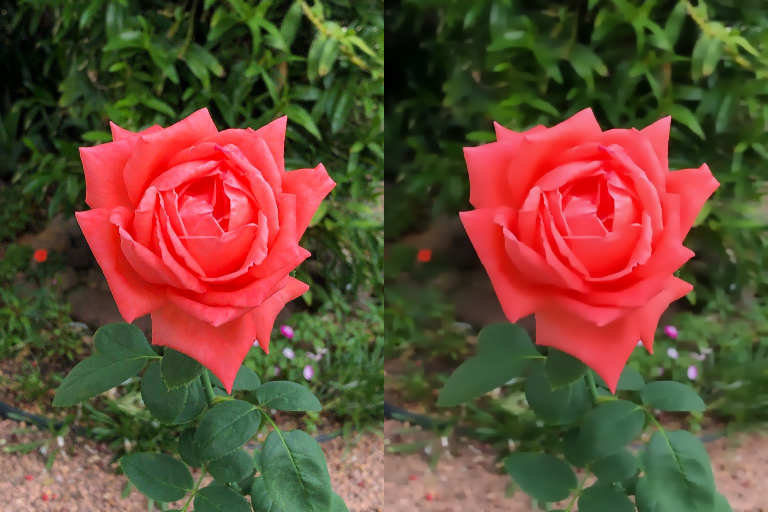

In [2]:
#SET PARAMETERS
imgfilename = "image1.jpg";
sigma = 50.00;
sigma_r = 51.00;
kappa = 2.00; #not needed
blocks_per_line = 3.00; #not needed
set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
#EXECUTE ALGORITHM A
subprocess.run("../Algorithm_A/main",shell=True);
image_original = Image.open('../images/image1.jpg')
image_A = Image.open('../output/resultA.jpg')
images = get_concat_h(image_original, image_A)
#scale down image
half = 0.5
images.resize( [int(half * s) for s in images.size] )

# Boundary effects : Generate figure 6

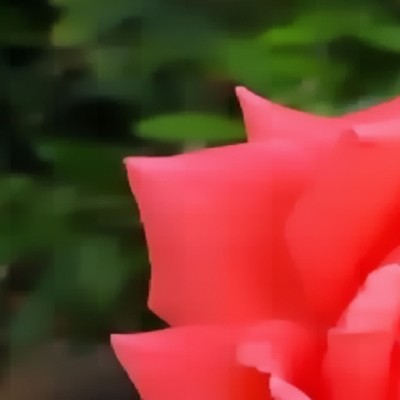

In [3]:
#SET PARAMETERS
imgfilename = "image1.jpg";
sigma = 50.00;
sigma_r = 51.00;
kappa = 0.0; 
blocks_per_line = 3.00; #not needed
set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
#EXECUTE ALGORITHM D
subprocess.run("../Algorithm_D/main",shell=True);
image_D = zoom_at(Image.open('../output/resultD.jpg'),200,326,3.5)
image_D.resize((400,400))


# Compare Algorithm A and Algorithm D: Generate figure 7

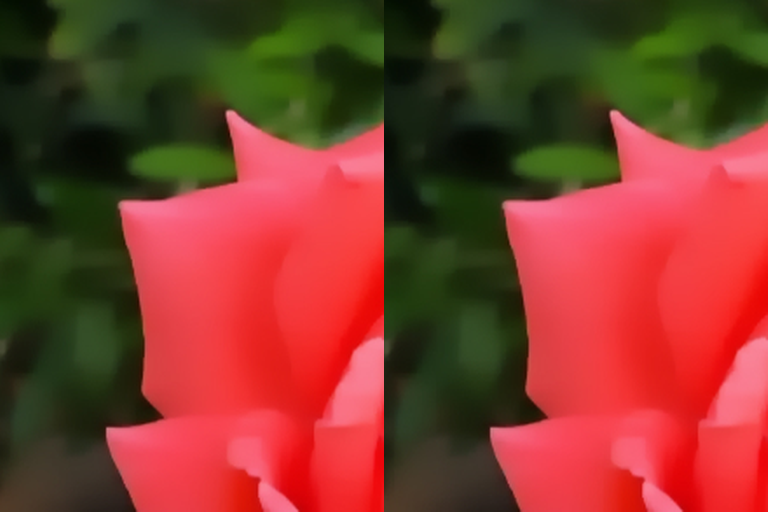

In [4]:
#SET PARAMETERS
imgfilename = "image1.jpg";
sigma = 50.00;
sigma_r = 51.00;
kappa = 1.50; #not needed
blocks_per_line = 3.00; #not needed
set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
#EXECUTE ALGORITHM A
subprocess.run("../Algorithm_A/main",shell=True);
#EXECUTE ALGORITHM D
subprocess.run("../Algorithm_D/main",shell=True);

image_A = zoom_at(Image.open('../output/resultA.jpg'),200,326,3.5)
image_D = zoom_at(Image.open('../output/resultD.jpg'),200,326,3.5)
images = get_concat_h(image_A, image_D)
#scale down image
half = 0.5
images.resize( [int(half * s) for s in images.size] )

## Filter image2.jpg -> Generate figure 8

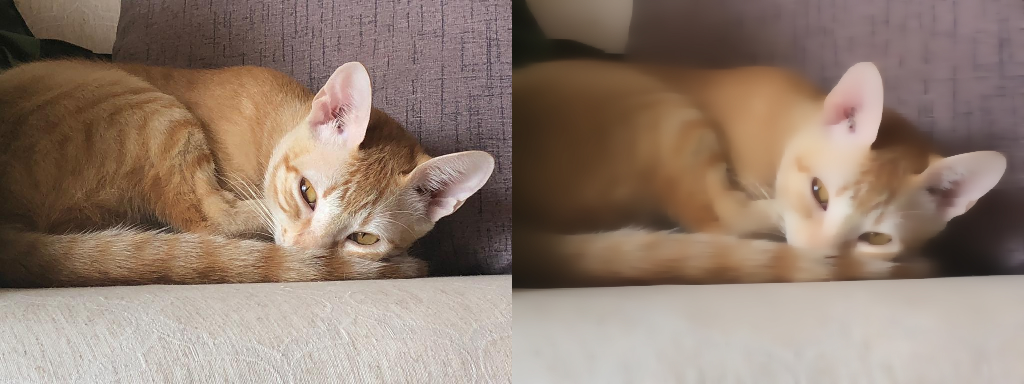

In [5]:
#SET PARAMETERS
imgfilename = "image2.jpg";
sigma = 70.00;
sigma_r = 150.00;
kappa = 2.00; #not needed
blocks_per_line = 3.00; #not needed
set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
#EXECUTE ALGORITHM A
subprocess.run("../Algorithm_A/main",shell=True);
image_original = Image.open('../images/image2.jpg')
image_A = Image.open('../output/resultA.jpg')
images = get_concat_h(image_original, image_A);
#scale down image
half = 0.5
images.resize( [int(half * s) for s in images.size] )